### 1st Virtual Methods Seminar: Methods of Computational Social Science
## Introduction to Social Network Science with Python
# Brokerage and Closure - Exercise 3.1 (Solutions)
Instructors: Haiko Lietz & Olga Zagovora

Date: September 23, 2020

## Exercise 1
In the slides for "Brokerage and Closure" there are two graphs on page 18. Construct them from scratch in the code cell below. Can you reproduce the constraint scores reported on the same slide?
## Solution 1
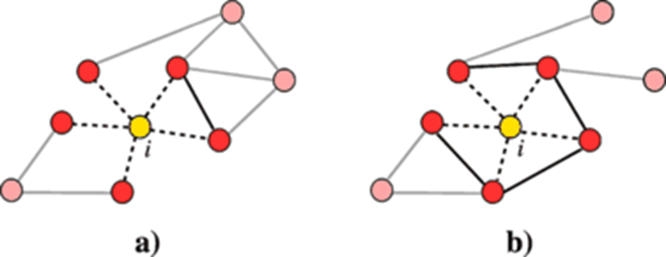

In [1]:
import networkx as nx

a2 = nx.Graph({1: [3, 4, 5, 6, 7], 2: [3, 4], 5: [7, 8], 6: [9], 7: [8, 9], 8: [9]})
b2 = nx.Graph({1: [3, 4, 5, 6, 7], 2: [3, 4], 3: [4, 5], 5: [7], 6: [7, 9], 7: [8]})

print(nx.constraint(a2)[1])
print(nx.constraint(b2)[1])

0.2536111111111111
0.4372222222222223


---

## Exercise 2
One strength of Jupyter Notebooks is that results can easily be reproduced and edited. In the demo notebook, add the scores for weighted graphs to the dataframe (by uncommenting them). Are there any surprise results when you look at the MDS plot?
## Solution 2
There are no surprises: [open notebook](31_brokerage_and_closure_exercise2_solution.ipynb)

---

## Exercise 3
Make a renamed duplicate of the demo notebook and edit it: instead of the elite families collection, load the Copenhagen Networks Study collection, chose the network of physical proximity (bluetooth) from the first day, extract the strongest signal for each node pair, and study the largest connected component. Then compute all the unweighted brokerage and closure scores and embed their correlations in a two-dimensional space. Do the metrics cluster as for the elite families collection?

Hint: The largest connected component of an undirected Graph $G$ is:

`G.subgraph(max(nx.connected_components(nx.G), key=len))`

## Solution 3
The metrics cluster as for the elite families collection: [open notebook](31_brokerage_and_closure_exercise3_solution.ipynb)

---

## Exercise 4
The effective size of a node's neighbor network is limited by the node's degree. Therefore, effective size can be normalized by dividing it by degree:

    effective_size_norm = effective_size / degree

Compute, plot, and think about this measure. What does it mean?

Hint: Both effecvtive_size and degree exist as dictionaries in the demo notebook. You need to find a way to divide them. There are multiple ways to do this.
## Solution 4
Append these code-snippets to the demo notebook:

- solution using dictionary comprehension:\
`effective_size_norm = {node: effective_size[node]/degree[node] for node in effective_size}`

- or, solution using pandas:\
`effective_size_norm = (nodes_scores['effective_size']/nodes_scores['degree']).reset_index(drop=True).to_dict()`

- plot degree vs. effective_size_norm\
`plt.scatter(degree.values(), effective_size_norm.values())`\
`plt.xlabel('degree')`\
`plt.ylabel('effective_size_norm')`\
`plt.show()`

This measure uses a node-specific normalization. Every node's brokerage potential is put into perspective by its own degree. Nodes with large degree will very likely have almost as large effective sizes because it is veryun likely that tjeir many neighbors are mutually connected. So nodes with large degrees will tend to have a normalized effective size of 1. That means, if the measure is useful at all, it is useful for networks with evenly distributed small degrees.